In [1]:
import pandas as pd
import re as re
import html

In [2]:
thread_df=pd.read_excel("C:\\Users\\tarun\\Downloads\\Sample Data\\Sample Data\\Threads.xlsx")

In [3]:
incident_df=pd.read_excel("C:\\Users\\tarun\\Downloads\\Sample Data\\Sample Data\\Incidents.xlsx")

In [4]:
thread_df.head(2)

,Threads,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,Foreign Key,Incident Thread ID,Account,Attributes,Date Created,Contact ID,Channel ID,Email Header,Sequence,SmartSense Indicator,Text,Thread Entry Type
1,2601,2773,No Value,No Value,04/10/2010 09:22,402,MA Email,No Value,1,0,\n\n==================== text File Attachment ...,Customer


In [5]:
incident_df.head(2)

,Incidents,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,Reference #,Incident ID,Assigned Account,Severity,Status,Status Type,Subject,Product ID,Organisation ID,Date Closed,Date Created,Contact ID,Category ID
1,100825-000001,2554,Stephen Pickett,No Value,Solved,Solved,A4e Professional Services work,No Value,1,25/08/2010 12:00,25/08/2010 12:00,573,No Value


In [6]:
header_row=0
thread_df.columns = thread_df.iloc[header_row]
incident_df.columns = incident_df.iloc[header_row]
thread_df=thread_df.drop(header_row)
incident_df=incident_df.drop(header_row)

In [7]:
thread_df.head()

,Foreign Key,Incident Thread ID,Account,Attributes,Date Created,Contact ID,Channel ID,Email Header,Sequence,SmartSense Indicator,Text,Thread Entry Type
1,2601,2773,No Value,No Value,04/10/2010 09:22,402,MA Email,No Value,1,0,\n\n==================== text File Attachment ...,Customer
2,2632,2809,No Value,No Value,05/11/2010 09:50,1983,CSS Web,No Value,1,5,Agents are experiencing an issue with Rightnow...,Customer
3,2601,2839,Stephen Pickett,No Value,11/01/2011 11:58,0,No Value,No Value,1,0,"Ad, see the attachment.",Note
4,2655,2842,No Value,No Value,12/01/2011 10:36,1243,CSS Web,No Value,1,-2,the phone display states \nNo service\nTrying ...,Customer
5,2655,2843,Alan Cheng,No Value,12/01/2011 11:02,0,Email,No Value,1,-48,"Had a look, appears to be a network port issue...",Staff Account


In [8]:
incident_df.head()

,Reference #,Incident ID,Assigned Account,Severity,Status,Status Type,Subject,Product ID,Organisation ID,Date Closed,Date Created,Contact ID,Category ID
1,100825-000001,2554,Stephen Pickett,No Value,Solved,Solved,A4e Professional Services work,No Value,1,25/08/2010 12:00,25/08/2010 12:00,573,No Value
2,101004-000000,2601,Adam Wilkinson,No Value,Solved,Solved,Measuring effectiveness increases effectiveness,No Value,29,11/01/2011 12:07,04/10/2010 09:22,402,No Value
3,101102-000000,2619,Stephen Pickett,No Value,Solved,Solved,Infoco Answer Export Tool,RightNow,560,02/11/2010 12:05,02/11/2010 12:05,2157,No Value
4,101102-000001,2620,Chris Farmer,Medium,Solved,Solved,THA: The Family Information Direct/Helplines S...,No Value,562,24/02/2011 13:56,02/11/2010 12:46,2144,No Value
5,101105-000000,2632,Alan Cheng,Medium,Solved,Solved,incident screen freezing incident - Ref 100924...,Instance Freezing,473,16/02/2011 15:09,05/11/2010 09:50,1983,No Value


In [9]:
thread_df.rename(columns={'Foreign Key':'Incident ID'}, inplace=True)
incident_df.rename(columns={'Product ID':'ProductID'}, inplace=True)

In [10]:
thread_df['Text']=thread_df['Text'].str.replace('\n','').str.replace('=','')

In [11]:
incident_df.shape

(19408, 13)

In [12]:
incident_df=incident_df[incident_df['Status']=='Solved']

In [13]:
incident_df.shape

(19197, 13)

In [14]:
inc_thread_df=thread_df[["Incident ID","Text"]].merge(incident_df[["Incident ID","Status","Subject","ProductID"]],on="Incident ID",how="left")

In [15]:
inc_thread_df.head()

,Incident ID,Text,Status,Subject,ProductID
0,2601,"text File Attachment Attachment 1.txt, 6224 b...",Solved,Measuring effectiveness increases effectiveness,No Value
1,2632,Agents are experiencing an issue with Rightnow...,Solved,incident screen freezing incident - Ref 100924...,Instance Freezing
2,2601,"Ad, see the attachment.",Solved,Measuring effectiveness increases effectiveness,No Value
3,2655,the phone display states No serviceTrying 10.1...,Solved,Phone on Mandy's desk not working,Other
4,2655,"Had a look, appears to be a network port issue...",Solved,Phone on Mandy's desk not working,Other


In [16]:
inc_thread_df.shape

(100000, 5)

In [17]:
inc_thread_df=inc_thread_df[inc_thread_df['ProductID']!='No Value']

In [18]:
inc_thread_df.head()

,Incident ID,Text,Status,Subject,ProductID
1,2632,Agents are experiencing an issue with Rightnow...,Solved,incident screen freezing incident - Ref 100924...,Instance Freezing
3,2655,the phone display states No serviceTrying 10.1...,Solved,Phone on Mandy's desk not working,Other
4,2655,"Had a look, appears to be a network port issue...",Solved,Phone on Mandy's desk not working,Other
5,2666,I have come into work this evening to find tha...,Solved,No Access to Rightnow on my computer,Other
6,2666,"Hi Paddy,I've called you a number of times on ...",Solved,No Access to Rightnow on my computer,Other


In [19]:
inc_thread_df.shape

(98084, 5)

In [20]:
print(inc_thread_df.isnull().sum())

0
Incident ID      0
Text             0
Status         222
Subject        222
ProductID      222
dtype: int64


In [21]:
inc_thread_df=inc_thread_df.dropna()

In [22]:
print(inc_thread_df.isnull().sum())

0
Incident ID    0
Text           0
Status         0
Subject        0
ProductID      0
dtype: int64


In [23]:
inc_thread_df.shape

(97862, 5)

In [24]:
inc_thread_df['Text'] = inc_thread_df.groupby(['Incident ID'])['Text'].transform(lambda x : ''.join(str(x)))

In [25]:
inc_thread_df = inc_thread_df.drop_duplicates()

In [26]:
inc_thread_df["Text"]=inc_thread_df["Subject"]+" "+inc_thread_df["Text"]

In [27]:
inc_thread_df.shape

(15524, 5)

In [28]:
inc_thread_df.head()

,Incident ID,Text,Status,Subject,ProductID
1,2632,incident screen freezing incident - Ref 100924...,Solved,incident screen freezing incident - Ref 100924...,Instance Freezing
3,2655,Phone on Mandy's desk not working 3 the pho...,Solved,Phone on Mandy's desk not working,Other
5,2666,No Access to Rightnow on my computer 5 I ha...,Solved,No Access to Rightnow on my computer,Other
9,2669,"BTB Right Now 9 Hiya, Can you re-install B...",Solved,BTB Right Now,Other
11,2670,Laptop Cal019 11 I am still unable to hear ...,Solved,Laptop Cal019,Other


In [29]:
print(inc_thread_df["Text"])

1        incident screen freezing incident - Ref 100924...
3        Phone on Mandy's desk not working 3    the pho...
5        No Access to Rightnow on my computer 5    I ha...
9        BTB Right Now 9     Hiya, Can you re-install B...
11       Laptop Cal019 11    I am still unable to hear ...
                               ...                        
99982    Evergreen 99982    Hi,Jane from Evergreen want...
99985    Password Encryption 99985    HiI've been asked...
99987    Evergreen Oracle Access 99987    Hi, Please ca...
99993    Ellis visibility 99993    HelloCurrently a few...
99996    Shaw Healthcare CRM Access 99996    Hello, Ple...
Name: Text, Length: 15524, dtype: object


In [30]:
def remove_tags(string):
    result = re.sub('<.*?>','',string)
    return result

In [31]:
inc_thread_df["Text"]=inc_thread_df["Text"].apply(lambda cw: remove_tags((cw)))

In [32]:
print(inc_thread_df["Text"])

1        incident screen freezing incident - Ref 100924...
3        Phone on Mandy's desk not working 3    the pho...
5        No Access to Rightnow on my computer 5    I ha...
9        BTB Right Now 9     Hiya, Can you re-install B...
11       Laptop Cal019 11    I am still unable to hear ...
                               ...                        
99982    Evergreen 99982    Hi,Jane from Evergreen want...
99985    Password Encryption 99985    HiI've been asked...
99987    Evergreen Oracle Access 99987    Hi, Please ca...
99993    Ellis visibility 99993    HelloCurrently a few...
99996    Shaw Healthcare CRM Access 99996    Hello, Ple...
Name: Text, Length: 15524, dtype: object


In [33]:
inc_thread_df['Text']=inc_thread_df['Text'].str.replace('\n','').str.replace('=','')

In [34]:
print(inc_thread_df["Text"])

1        incident screen freezing incident - Ref 100924...
3        Phone on Mandy's desk not working 3    the pho...
5        No Access to Rightnow on my computer 5    I ha...
9        BTB Right Now 9     Hiya, Can you re-install B...
11       Laptop Cal019 11    I am still unable to hear ...
                               ...                        
99982    Evergreen 99982    Hi,Jane from Evergreen want...
99985    Password Encryption 99985    HiI've been asked...
99987    Evergreen Oracle Access 99987    Hi, Please ca...
99993    Ellis visibility 99993    HelloCurrently a few...
99996    Shaw Healthcare CRM Access 99996    Hello, Ple...
Name: Text, Length: 15524, dtype: object


In [35]:
def decode_text(string):
    result = html.unescape(string)
    return result

In [36]:
inc_thread_df["Text"]=inc_thread_df["Text"].apply(lambda cw: decode_text(cw))

In [37]:
print(inc_thread_df["Text"])

1        incident screen freezing incident - Ref 100924...
3        Phone on Mandy's desk not working 3    the pho...
5        No Access to Rightnow on my computer 5    I ha...
9        BTB Right Now 9     Hiya, Can you re-install B...
11       Laptop Cal019 11    I am still unable to hear ...
                               ...                        
99982    Evergreen 99982    Hi,Jane from Evergreen want...
99985    Password Encryption 99985    HiI've been asked...
99987    Evergreen Oracle Access 99987    Hi, Please ca...
99993    Ellis visibility 99993    HelloCurrently a few...
99996    Shaw Healthcare CRM Access 99996    Hello, Ple...
Name: Text, Length: 15524, dtype: object


In [38]:
inc_thread_df['Text'] = inc_thread_df['Text'].replace(r'https?:\/\/.\S+', '', regex=True).replace(r'www\S+', '', regex=True)

In [39]:
inc_thread_df["Text"]=inc_thread_df["Text"].str.lower()

In [40]:
print(inc_thread_df["Text"])

1        incident screen freezing incident - ref 100924...
3        phone on mandy's desk not working 3    the pho...
5        no access to rightnow on my computer 5    i ha...
9        btb right now 9     hiya, can you re-install b...
11       laptop cal019 11    i am still unable to hear ...
                               ...                        
99982    evergreen 99982    hi,jane from evergreen want...
99985    password encryption 99985    hii've been asked...
99987    evergreen oracle access 99987    hi, please ca...
99993    ellis visibility 99993    hellocurrently a few...
99996    shaw healthcare crm access 99996    hello, ple...
Name: Text, Length: 15524, dtype: object


In [41]:
Apos_dict={"'s":" is","n't":" not","'m":" am","'ll":" will","'d":" would","'ve":" have","'re":" are"}
def contraction_text(string):
    for key,value in Apos_dict.items():
        if key in string:
            result=string.replace(key,value)
            return result
        else:
            return string

In [42]:
inc_thread_df["Text"]=inc_thread_df["Text"].apply(lambda cw: contraction_text(cw))

In [43]:
print(inc_thread_df["Text"])

1        incident screen freezing incident - ref 100924...
3        phone on mandy is desk not working 3    the ph...
5        no access to rightnow on my computer 5    i ha...
9        btb right now 9     hiya, can you re-install b...
11       laptop cal019 11    i am still unable to hear ...
                               ...                        
99982    evergreen 99982    hi,jane from evergreen want...
99985    password encryption 99985    hii've been asked...
99987    evergreen oracle access 99987    hi, please ca...
99993    ellis visibility 99993    hellocurrently a few...
99996    shaw healthcare crm access 99996    hello, ple...
Name: Text, Length: 15524, dtype: object


In [44]:
def space_text(string):
    result=string.strip()
    return result

In [45]:
inc_thread_df["Text"]=inc_thread_df["Text"].apply(lambda cw: space_text(cw))

In [46]:
def punction_text(string):
    result = re.sub(r'[^\w\s]', '', string)
    return result

In [47]:
#removing punctions
inc_thread_df["Text"]=inc_thread_df["Text"].apply(lambda cw: punction_text(cw))

In [48]:
print(inc_thread_df["Text"])

1        incident screen freezing incident  ref 1009240...
3        phone on mandy is desk not working 3    the ph...
5        no access to rightnow on my computer 5    i ha...
9        btb right now 9     hiya can you reinstall btb...
11       laptop cal019 11    i am still unable to hear ...
                               ...                        
99982    evergreen 99982    hijane from evergreen wants...
99985    password encryption 99985    hiive been asked ...
99987    evergreen oracle access 99987    hi please can...
99993    ellis visibility 99993    hellocurrently a few...
99996    shaw healthcare crm access 99996    hello plea...
Name: Text, Length: 15524, dtype: object


In [49]:
inc_thread_df.shape

(15524, 5)

In [50]:
pattern = r'[0-9]'
def nums_text(string):
    result=re.sub(pattern, '', string)
    return result

In [51]:
inc_thread_df["Text"]=inc_thread_df["Text"].apply(lambda cw: nums_text(cw))

In [52]:
inc_thread_df.head()

,Incident ID,Text,Status,Subject,ProductID
1,2632,incident screen freezing incident ref ...,Solved,incident screen freezing incident - Ref 100924...,Instance Freezing
3,2655,phone on mandy is desk not working the pho...,Solved,Phone on Mandy's desk not working,Other
5,2666,no access to rightnow on my computer i hav...,Solved,No Access to Rightnow on my computer,Other
9,2669,btb right now hiya can you reinstall btb ...,Solved,BTB Right Now,Other
11,2670,laptop cal i am still unable to hear voice...,Solved,Laptop Cal019,Other


In [53]:
print(inc_thread_df["Text"])

1        incident screen freezing incident  ref        ...
3        phone on mandy is desk not working     the pho...
5        no access to rightnow on my computer     i hav...
9        btb right now      hiya can you reinstall btb ...
11       laptop cal     i am still unable to hear voice...
                               ...                        
99982    evergreen     hijane from evergreen wants to k...
99985    password encryption     hiive been asked to fi...
99987    evergreen oracle access     hi please can i re...
99993    ellis visibility     hellocurrently a few of u...
99996    shaw healthcare crm access     hello please ca...
Name: Text, Length: 15524, dtype: object


In [54]:
inc_thread_df.describe()

,Incident ID,Text,Status,Subject,ProductID
count,15524,15524,15524,15524,15524
unique,15524,15204,1,12456,92
top,22200,service alert migrant help no callschats ans...,Solved,Service Alert - Migrant Help - No Calls/Chats ...,Other
freq,1,21,15524,176,3071


In [55]:
inc_thread_df.ProductID.unique()

array(['Instance Freezing', 'Other', 'Outlook', 'Communicator',
       'Wireless Password', 'Missing Data', 'Password Issue',
       'CommsOffice', 'Website', 'Intranet', 'Wallboard', 'Agent Toolbar',
       'Shared Drive', 'Custom Application', 'Login Error', 'Printer',
       'Customer Portal', 'Existing Customer', 'Mouse',
       'Installations and Upgrades', 'Monitor', 'Keyboard', 'Logins',
       'Microsoft Office (Excluding Outlook)', 'Connect for PHP',
       'Answers', 'Outbound E-mail', 'Wireless Issue', 'Analytics',
       'Contacts and Organisations', 'Facebook App',
       'Oracle Service Cloud', 'Software', 'Custom Objects',
       'Web Services (SOAP/WSDL)', 'System Configuration',
       'Agent Desktop', 'Customisation', 'Campaigns', 'Workspaces',
       'Incidents', 'Marketing', 'Multi-Channel Helplines',
       'Telephone Service', 'RightNow', 'Upgrade', 'Windows', 'Rules',
       'Profiles / Staff Accounts', 'Client Workstation',
       'Internal Projects', 'Connect A

In [56]:
inc_thread_df["Text"]=inc_thread_df["Text"].str.replace('dtype','').str.replace('name','').str.replace('hi','').str.replace('hello','').str.replace('dear','').str.replace('thank','').str.replace('sorry','')

In [57]:
import numpy as np
from scipy.stats import randint
import seaborn as sns # used for plot interactive graph. 
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [58]:
inc_thread_df['pro_id'] = inc_thread_df['ProductID'].factorize()[0]
category_id_f2 = inc_thread_df[['ProductID', 'pro_id']].drop_duplicates()

pro_to_id = dict(category_id_f2.values)
id_to_category = dict(category_id_f2[['pro_id', 'ProductID']].values)

In [59]:
inc_thread_df.head(10)

,Incident ID,Text,Status,Subject,ProductID,pro_id
1,2632,incident screen freezing incident ref ...,Solved,incident screen freezing incident - Ref 100924...,Instance Freezing,0
3,2655,phone on mandy is desk not working the pho...,Solved,Phone on Mandy's desk not working,Other,1
5,2666,no access to rightnow on my computer i hav...,Solved,No Access to Rightnow on my computer,Other,1
9,2669,btb right now ya can you reinstall btb ri...,Solved,BTB Right Now,Other,1
11,2670,laptop cal i am still unable to hear voice...,Solved,Laptop Cal019,Other,1
14,2672,outlook can you install outlook for me ple...,Solved,Outlook,Outlook,2
16,2673,shoreware agent manager ya shoreware agent...,Solved,Shoreware Agent manager,Other,1
18,2674,patrick has an issue logging in to casupport ...,Solved,Patrick has an issue logging in to CASupport,Other,1
20,2675,phone recorder not working joanne gauntlet...,Solved,Phone Recorder not working,Communicator,3
21,2676,wireless login issue stuart isnt sure wch ...,Solved,Wireless login issue,Wireless Password,4


In [60]:
inc_thread_df.shape

(15524, 6)

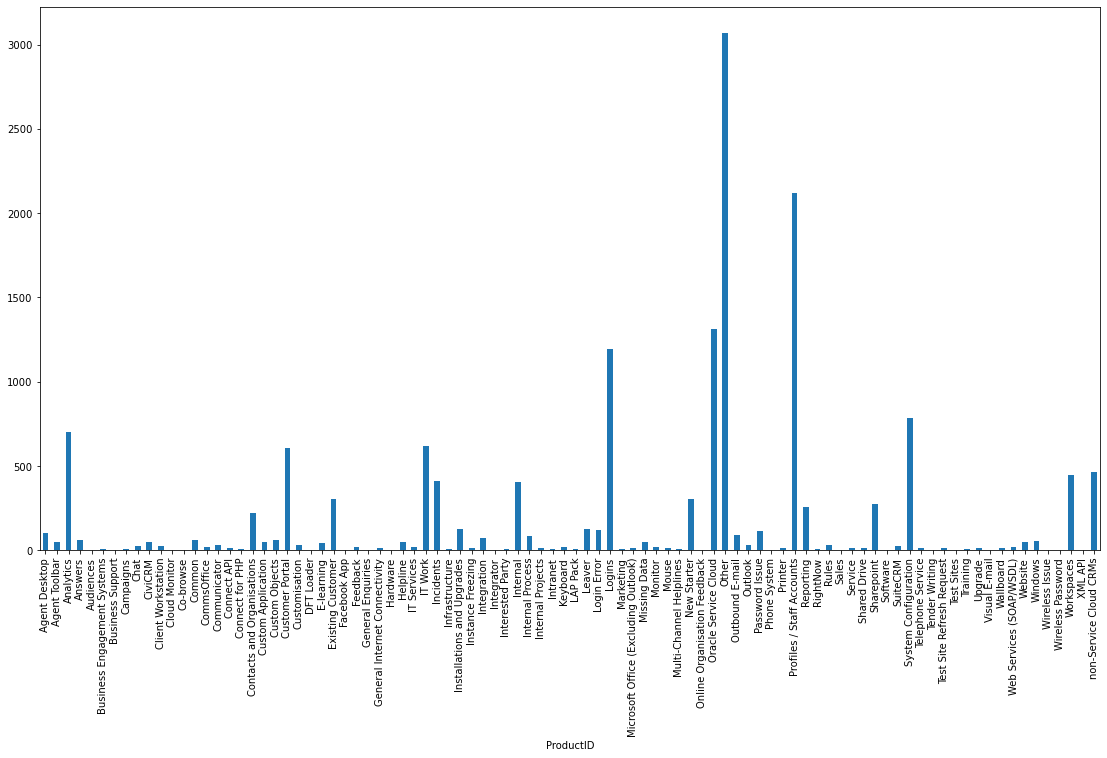

In [61]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(19,10))
inc_thread_df.groupby('ProductID').Text.count().plot.bar(ylim=0)
plt.show()

In [62]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(inc_thread_df.Text)
labels = inc_thread_df.pro_id
print("Each of the %d complaints is represented by %d features (TF-IDF score of unigrams and bigrams)" %(features.shape))

Each of the 15524 complaints is represented by 12597 features (TF-IDF score of unigrams and bigrams)


In [63]:
N = 3
for ProductID,pro_id in sorted(pro_to_id.items()):
    features_chi = chi2(features, labels == pro_id)
    indices = np.argsort(features_chi[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("\n==> %s:" %(ProductID))
    print("  * Most Correlated Unigrams are: %s" %(', '.join(unigrams[-N:])))
    print("  * Most Correlated Bigrams are: %s" %(', '.join(bigrams[-N:])))


==> Agent Desktop:
  * Most Correlated Unigrams are: chat, accountnew, creationnew
  * Most Correlated Bigrams are: created email, order created, work order

==> Agent Toolbar:
  * Most Correlated Unigrams are: shortel, toolbar, shoretel
  * Most Correlated Bigrams are: copy incident, agent toolbar, ts copy

==> Analytics:
  * Most Correlated Unigrams are: daily, reports, report
  * Most Correlated Bigrams are: barbaraplease fin, monthly reports, ts report

==> Answers:
  * Most Correlated Unigrams are: factsheets, knowledgebase, answers
  * Most Correlated Bigrams are: alice contacting, checking object, kevin contacting

==> Audiences:
  * Most Correlated Unigrams are: claudiawe, translation, series
  * Most Correlated Bigrams are: professi mohanplease, connect yes, renie cont

==> Business Engagement Systems:
  * Most Correlated Unigrams are: steph, sendgrid, preferred
  * Most Correlated Bigrams are: barnardo toy, paddy power, project object

==> Business Support:
  * Most Correlat


==> Monitor:
  * Most Correlated Unigrams are: screen, turned, monitor
  * Most Correlated Bigrams are: kellyjust confirm, agent screen, welcome screen

==> Mouse:
  * Most Correlated Unigrams are: kimmins, informing, mouse
  * Most Correlated Bigrams are: rory demery, amanda kimmins, new mouse

==> Multi-Channel Helplines:
  * Most Correlated Unigrams are: implementation, matters, sugges
  * Most Correlated Bigrams are: natalie object, access volt, site object

==> New Starter:
  * Most Correlated Unigrams are: mh, asset, starter
  * Most Correlated Bigrams are: ready attached, new starter, starter form

==> Online Organisation Feedback:
  * Most Correlated Unigrams are: trust, weekly, giles
  * Most Correlated Bigrams are: sent customer, giles trust, update sent

==> Oracle Service Cloud:
  * Most Correlated Unigrams are: span, employer, oracle
  * Most Correlated Bigrams are: contacting se, aaronweve confirmation, confirmation issue

==> Other:
  * Most Correlated Unigrams are: yac

In [64]:
X=inc_thread_df['Text']
y=inc_thread_df['ProductID']

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.15,random_state = 42)

In [66]:
models = [
    RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
    svm.SVC()
]

# 5 Cross-validation
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))

entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
    
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

C:\Users\tarun\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:665: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\tarun\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:665: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\tarun\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:665: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\tarun\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:665: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\tarun\anaconda3\lib\site-packages\s

In [67]:
mean_accuracy = cv_df.groupby('model_name').accuracy.mean()
std_accuracy = cv_df.groupby('model_name').accuracy.std()

acc = pd.concat([mean_accuracy, std_accuracy], axis= 1, 
          ignore_index=True)
acc.columns = ['Mean Accuracy', 'Standard deviation']
acc

,Mean Accuracy,Standard deviation
model_name,,
LinearSVC,0.296635,0.035175
LogisticRegression,0.327235,0.018463
MultinomialNB,0.282466,0.016206
RandomForestClassifier,0.221399,0.009369
SVC,0.323241,0.015724


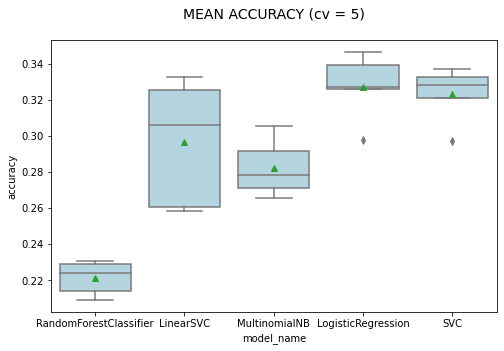

In [68]:
plt.figure(figsize=(8,5))
sns.boxplot(x='model_name', y='accuracy', 
            data=cv_df, 
            color='lightblue', 
            showmeans=True)
plt.title("MEAN ACCURACY (cv = 5)\n", size=14);

In [69]:
X_train, X_test, y_train, y_test,indices_train,indices_test = train_test_split(features, 
                                                               labels, 
                                                               inc_thread_df.index, test_size=0.15, 
                                                               random_state=1)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

C:\Users\tarun\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [70]:
print('\t\t\t\tCLASSIFICATIION METRICS\n')
print(metrics.classification_report(y_test, y_pred))

				CLASSIFICATIION METRICS

              precision    recall  f1-score   support

           1       0.36      0.80      0.50       461
           2       0.00      0.00      0.00         7
           3       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         9
           6       0.00      0.00      0.00        12
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00        11
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         9
          12       0.00      0.00      0.00         2
          13       0.00      0.00      0.00         6
          14       0.00      0.00      0.00        21
          15       0.00      0.00      0.00         2
          16       0.51      0.37      0.43        90
          17       0.45      0.09      0.15        55
          18       0.00      0.00      0.00         1
          19       0.00      0.00      0.00        1

C:\Users\tarun\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [71]:
X_train, X_test, y_train, y_test,indices_train,indices_test = train_test_split(features, 
                                                               labels, 
                                                               inc_thread_df.index, test_size=0.15, 
                                                               random_state=1)
model = LinearSVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [72]:
print('\t\t\t\tCLASSIFICATIION METRICS\n')
print(metrics.classification_report(y_test, y_pred))

				CLASSIFICATIION METRICS

              precision    recall  f1-score   support

           1       0.45      0.55      0.50       461
           2       0.67      0.29      0.40         7
           3       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         9
           6       0.00      0.00      0.00        12
           7       0.33      0.67      0.44         3
           8       1.00      0.36      0.53        11
          10       0.00      0.00      0.00         1
          11       0.17      0.11      0.13         9
          12       0.50      0.50      0.50         2
          13       0.00      0.00      0.00         6
          14       0.27      0.14      0.19        21
          15       0.00      0.00      0.00         2
          16       0.41      0.51      0.45        90
          17       0.46      0.29      0.36        55
          18       0.50      1.00      0.67         1
          19       0.25      0.08      0.12        1

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25,
                                                    random_state = 1)

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
                        ngram_range=(1, 2), 
                        stop_words='english')

fitted_vectorizer = tfidf.fit(X_train)
tfidf_vectorizer_vectors = fitted_vectorizer.transform(X_train)

model = LogisticRegression().fit(tfidf_vectorizer_vectors, y_train)

C:\Users\tarun\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [74]:
new_complaint = """Good morning,I have been locked out of my Right Now account, please can you assist?Many thanksHelenHelen TesterWellbeing CoordinatorPharmacist Support5th Floor196 DeansgateManchesterM3 3WFDirect: 0161 441 0811Enquiry Line: 0808 168 2233Website: www.pharmacistsupport.org<http://www.pharmacistsupport.org/>NEW Charity Number:Pharmacist Support is a charitable company limited by guarantee registered in England and Wales with company number 9237609 and charity number 1158974."""
print(model.predict(fitted_vectorizer.transform([new_complaint])))

['Profiles / Staff Accounts']


In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25,
                                                    random_state = 0)

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
                        ngram_range=(1, 3), 
                        stop_words='english')

fitted_vectorizer = tfidf.fit(X_train)
tfidf_vectorizer_vectors = fitted_vectorizer.transform(X_train)

model = LinearSVC().fit(tfidf_vectorizer_vectors, y_train)

In [76]:
new_complaint = """Good morning,I have been locked out of my Right Now account, please can you assist?Many thanksHelenHelen TesterWellbeing CoordinatorPharmacist Support5th Floor196 DeansgateManchesterM3 3WFDirect: 0161 441 0811Enquiry Line: 0808 168 2233Website: www.pharmacistsupport.org<http://www.pharmacistsupport.org/>NEW Charity Number:Pharmacist Support is a charitable company limited by guarantee registered in England and Wales with company number 9237609 and charity number 1158974."""
print(model.predict(fitted_vectorizer.transform([new_complaint])))

['Profiles / Staff Accounts']
